In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import date
##https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis for above

%matplotlib inline

In [2]:
## Import the dataset into a Dataframe
df = pd.read_csv('Anxiety_Depression_Dataset.csv')
len(df)

15858

In [3]:
## Visualize all of the columns
df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

In [4]:
### What we need to explore further:
### Phase, Time Period, Time Period Label, Value
df.head(20)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,18.4,17.0,19.7,17.0 - 19.7,NaN
6,Symptoms of Depressive Disorder,By Age,United States,70 - 79 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,13.6,11.8,15.5,11.8 - 15.5,NaN
7,Symptoms of Depressive Disorder,By Age,United States,80 years and above,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,14.4,9.0,21.4,9.0 - 21.4,NaN
8,Symptoms of Depressive Disorder,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,20.8,19.6,22.0,19.6 - 22.0,NaN
9,Symptoms of Depressive Disorder,By Sex,United States,Female,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,26.1,25.2,27.1,25.2 - 27.1,NaN


In [5]:
df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [6]:
### View the number of time unique time periods
len(df['Time Period Label'].unique())

78

In [7]:
df['Value'].max()
df['Value'].min()

4.7

In [8]:
## Checks the columns to see if there are any null values
print(df.isnull().sum())

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      706
Low CI                     706
High CI                    706
Confidence Interval        706
Quartile Range            5453
dtype: int64


In [9]:
## Drop rows that have a null value in the "Value column"
df = df.dropna(subset=['Value'])
print(len(df))

15152


In [10]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [11]:
df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [12]:
## Check dtypes
df.dtypes

Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
Low CI                    float64
High CI                   float64
Confidence Interval        object
Quartile Range             object
dtype: object

In [13]:
## Convert Dates to Datetime format 
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])
df.dtypes

Indicator                         object
Group                             object
State                             object
Subgroup                          object
Phase                             object
Time Period                        int64
Time Period Label                 object
Time Period Start Date    datetime64[ns]
Time Period End Date      datetime64[ns]
Value                            float64
Low CI                           float64
High CI                          float64
Confidence Interval               object
Quartile Range                    object
dtype: object

In [14]:
## Creates a new dataframe that gets the percentage of people who have Symptoms of EITHER Depressive Disorder or Anxiety Disorder, Only have Anxiety Disorder, and Only have Depressive disorder
df_anxiety_and_depression_national = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
df_anxiety_national = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Anxiety Disorder')]
df_depression_national = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Depressive Disorder')]

In [15]:
## Converts the datetime column "Time Period Start Date" to an ordinal value so linear regression may be run on it
df_anxiety_and_depression_national['Ordinal Date'] = pd.to_datetime(df_anxiety_and_depression_national['Time Period Start Date']).apply(lambda date: date.toordinal())
df_anxiety_national['Ordinal Date'] = pd.to_datetime(df_anxiety_national['Time Period Start Date']).apply(lambda date: date.toordinal())
df_depression_national['Ordinal Date'] = pd.to_datetime(df_depression_national['Time Period Start Date']).apply(lambda date: date.toordinal())
##https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis for above
df_anxiety_and_depression_national.head()

C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_31748\574697734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety_and_depression_national['Ordinal Date'] = pd.to_datetime(df_anxiety_and_depression_national['Time Period Start Date']).apply(lambda date: date.toordinal())
C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_31748\574697734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety_national['Ordinal Date'] = pd.to_datetime(df_anxiety_national['Time Period Start Date'

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Ordinal Date
140,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,35.9,35.0,36.8,35.0 - 36.8,NaN,737538
350,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,2,"May 7 - May 12, 2020",2020-05-07,2020-05-12,34.4,33.3,35.5,33.3 - 35.5,NaN,737552
560,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,3,"May 14 - May 19, 2020",2020-05-14,2020-05-19,33.9,33.1,34.7,33.1 - 34.7,NaN,737559
770,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,4,"May 21 - May 26, 2020",2020-05-21,2020-05-26,34.3,33.6,35.1,33.6 - 35.1,NaN,737566
980,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,5,"May 28 - June 2, 2020",2020-05-28,2020-06-02,35.5,34.8,36.1,34.8 - 36.1,NaN,737573


In [16]:
## Perform linear regression on the all three dataframes
slope_b, yint_b, r_b, p_b, std_err_b = stats.linregress(df_anxiety_and_depression_national['Ordinal Date'], df_anxiety_and_depression_national['Value'])
slope_a, yint_a, r_a, p_a, std_err_a = stats.linregress(df_anxiety_national['Ordinal Date'], df_anxiety_national['Value'])
slope_d, yint_d, r_d, p_d, std_err_d = stats.linregress(df_depression_national['Ordinal Date'], df_depression_national['Value'])
## Calculate the best fit line for all three
best_fit_b = slope_b * df_anxiety_and_depression_national['Ordinal Date'] + yint_b
best_fit_a = slope_a * df_anxiety_national['Ordinal Date'] + yint_a
best_fit_d = slope_d * df_depression_national['Ordinal Date'] + yint_d

In [17]:
df_anxiety_and_depression_national['Time Period Start Date'].min()

Timestamp('2020-04-23 00:00:00')

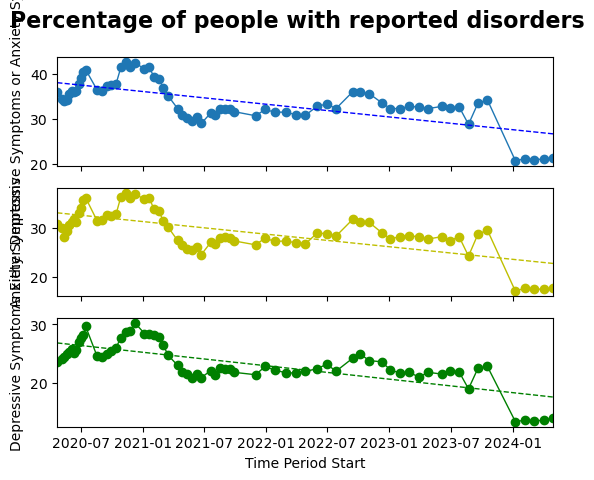

In [109]:
## Perform linear regression
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Percentage of people with reported disorders", fontsize=16, fontweight="bold")

ax1.set_xlim(df_anxiety_and_depression_national['Time Period Start Date'].min(), df_anxiety_and_depression_national['Time Period Start Date'].max())
ax1.plot(df_anxiety_and_depression_national['Time Period Start Date'], df_anxiety_and_depression_national['Value'], linewidth=1, marker="o")
ax1.plot(df_anxiety_and_depression_national['Time Period Start Date'], best_fit_b, "b--", linewidth=1)
ax1.set_ylabel('Either Depressive Symptoms or Anxiety Symptoms')

ax2.plot(df_anxiety_and_depression_national['Time Period Start Date'], df_anxiety_national['Value'], linewidth=1, marker="o", color="y")
ax2.plot(df_anxiety_and_depression_national['Time Period Start Date'], best_fit_a, "y--", linewidth=1)
ax2.set_ylabel('Anxiety Symptoms')

ax3.plot(df_anxiety_and_depression_national['Time Period Start Date'], df_depression_national['Value'], linewidth=1, marker="o", color="g")
ax3.plot(df_anxiety_and_depression_national['Time Period Start Date'], best_fit_d, "g--", linewidth=1)
ax3.set_xlabel("Time Period Start")
ax3.set_ylabel("Depressive Symptoms")

plt.show()

In [171]:
## Create a DataFrame with one hot encoded columns for race
## This encodes the column determining whether or not they were 'Black'
## Filters it down to rows that are grouped by race
df_race = df
df_race = df_race.loc[df_race['Group'] == 'By Race/Hispanic ethnicity']

In [172]:
## Method to one hot encode a feature into a column based on the Subgroup column
def one_hot_encode(col,colName,df):
    df.loc[:,col] = 0
    df.loc[df['Subgroup'] == colName,col] = 1


In [173]:
## Cleans up the dataframe to contain only the necessary columns
def clean_up_df(df):
    df = df.drop(columns = ['Group','Subgroup','Time Period End Date','Confidence Interval','Quartile Range','Low CI','High CI','Phase','State','Time Period'])
    return df

In [174]:
## This encodes the column determining whether or not they were 'White' and single race, 1 if they are and 0 if they are not
one_hot_encode('Black','Non-Hispanic Black, single race',df_race)
one_hot_encode('White','Non-Hispanic White, single race',df_race)
one_hot_encode('Asian','Non-Hispanic Asian, single race',df_race)
one_hot_encode('Hispanic','Hispanic or Latino',df_race)
one_hot_encode('Other','Non-Hispanic, other races and multiple races',df_race)

C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_31748\2003061425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = 0
C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_31748\2003061425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = 0
C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_31748\2003061425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [175]:
df_race = clean_up_df(df_race)
df_race

,Indicator,Time Period Label,Time Period Start Date,Value,Black,White,Asian,Hispanic,Other
10,Symptoms of Depressive Disorder,"Apr 23 - May 5, 2020",2020-04-23,29.4,0,0,0,1,0
11,Symptoms of Depressive Disorder,"Apr 23 - May 5, 2020",2020-04-23,21.4,0,1,0,0,0
12,Symptoms of Depressive Disorder,"Apr 23 - May 5, 2020",2020-04-23,25.6,1,0,0,0,0
13,Symptoms of Depressive Disorder,"Apr 23 - May 5, 2020",2020-04-23,23.6,0,0,1,0,0
14,Symptoms of Depressive Disorder,"Apr 23 - May 5, 2020",2020-04-23,28.3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
15796,Symptoms of Anxiety Disorder or Depressive Dis...,"Apr 30 - May 27, 2024",2024-04-30,23.0,0,0,0,1,0
15797,Symptoms of Anxiety Disorder or Depressive Dis...,"Apr 30 - May 27, 2024",2024-04-30,21.0,0,1,0,0,0
15798,Symptoms of Anxiety Disorder or Depressive Dis...,"Apr 30 - May 27, 2024",2024-04-30,19.6,1,0,0,0,0
15799,Symptoms of Anxiety Disorder or Depressive Dis...,"Apr 30 - May 27, 2024",2024-04-30,14.4,0,0,1,0,0


In [177]:
df_sex = df
df_sex = df_sex.loc[df_sex['Group'] == 'By Sex']
df_sex['Subgroup'].unique()
df_sex

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
8,Symptoms of Depressive Disorder,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,20.8,19.6,22.0,19.6 - 22.0,NaN
9,Symptoms of Depressive Disorder,By Sex,United States,Female,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,26.1,25.2,27.1,25.2 - 27.1,NaN
78,Symptoms of Anxiety Disorder,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,26.1,24.7,27.5,24.7 - 27.5,NaN
79,Symptoms of Anxiety Disorder,By Sex,United States,Female,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,35.4,34.5,36.3,34.5 - 36.3,NaN
148,Symptoms of Anxiety Disorder or Depressive Dis...,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,31.0,29.6,32.3,29.6 - 32.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15633,Symptoms of Depressive Disorder,By Sex,United States,Female,4.1,68,"Apr 30 - May 27, 2024",2024-04-30,2024-05-27,14.3,13.6,15.0,13.6 - 15.0,NaN
15710,Symptoms of Anxiety Disorder,By Sex,United States,Male,4.1,68,"Apr 30 - May 27, 2024",2024-04-30,2024-05-27,14.6,13.7,15.6,13.7 - 15.6,NaN
15711,Symptoms of Anxiety Disorder,By Sex,United States,Female,4.1,68,"Apr 30 - May 27, 2024",2024-04-30,2024-05-27,20.4,19.6,21.1,19.6 - 21.1,NaN
15788,Symptoms of Anxiety Disorder or Depressive Dis...,By Sex,United States,Male,4.1,68,"Apr 30 - May 27, 2024",2024-04-30,2024-05-27,19.0,18.0,20.1,18.0 - 20.1,NaN


In [178]:
one_hot_encode('Male','Male',df_sex)
one_hot_encode('Female','Female',df_sex)
df_sex = clean_up_df(df_sex)

C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_31748\2003061425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = 0
C:\Users\Alexander Baraban\AppData\Local\Temp\ipykernel_31748\2003061425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = 0


In [179]:
df_sex

,Indicator,Time Period Label,Time Period Start Date,Value,Male,Female
8,Symptoms of Depressive Disorder,"Apr 23 - May 5, 2020",2020-04-23,20.8,1,0
9,Symptoms of Depressive Disorder,"Apr 23 - May 5, 2020",2020-04-23,26.1,0,1
78,Symptoms of Anxiety Disorder,"Apr 23 - May 5, 2020",2020-04-23,26.1,1,0
79,Symptoms of Anxiety Disorder,"Apr 23 - May 5, 2020",2020-04-23,35.4,0,1
148,Symptoms of Anxiety Disorder or Depressive Dis...,"Apr 23 - May 5, 2020",2020-04-23,31.0,1,0
...,...,...,...,...,...,...
15633,Symptoms of Depressive Disorder,"Apr 30 - May 27, 2024",2024-04-30,14.3,0,1
15710,Symptoms of Anxiety Disorder,"Apr 30 - May 27, 2024",2024-04-30,14.6,1,0
15711,Symptoms of Anxiety Disorder,"Apr 30 - May 27, 2024",2024-04-30,20.4,0,1
15788,Symptoms of Anxiety Disorder or Depressive Dis...,"Apr 30 - May 27, 2024",2024-04-30,19.0,1,0
